### Часть 2
Используя скаченные данные и `Pandas` (или `PySpark`) посчитайте:
- явку (%) по всем ТИК, результат отсортировать по убыванию
- выберите произвольного кандидата и найдите тот избиратльный участок, на котором он получил наибольший результат  (%, учитывать участки на которых проголосовало больше 100 человек)
- найдите ТИК, где разница между УИК с наибольшей явкой и наименьшей максимальна
- посчитайте дисперсию по явке для каждого ТИК (учитывать УИК)
- для каждого кандидата посчитайте таблицу: результат (%, округленный до целого) - количество УИК, на которых кандидат получил данный результат
- визуализируйте отношение - явка на УИК $\rightarrow$ результат кандидата. 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dataframe.csv')  
df

,tik,yik,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,1,1803,1200,587,11,602,11,587,23,575,0,0,110,345,120
1,1,2,1466,1100,433,14,653,14,430,19,425,0,0,53,326,46
2,1,3,2092,1600,576,22,1002,22,576,15,583,0,0,155,332,96
3,1,4,1056,1000,318,4,678,4,318,13,309,0,0,67,171,71
4,1,5,1827,1400,495,8,897,8,493,16,485,0,0,137,266,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,30,2350,284,300,166,53,81,53,166,0,219,0,0,21,184,14
2017,30,2351,132,150,86,27,37,27,86,2,111,0,0,7,91,13
2018,30,2352,320,350,217,23,110,23,217,4,236,0,0,20,193,23
2019,30,2355,485,500,335,12,153,12,335,2,345,0,0,23,290,32


1.  явку (%) по всем ТИК, результат отсортировать по убыванию

In [3]:
((df.groupby('tik').sum()['3'] + df.groupby('tik').sum()['4']) / df.groupby('tik').sum()['1']).sort_values(ascending=False)

tik
18    0.515312
15    0.400131
13    0.396726
19    0.378124
8     0.360410
20    0.337806
9     0.335220
22    0.324863
30    0.321020
2     0.317879
1     0.314833
29    0.307705
10    0.305174
4     0.304318
7     0.292541
21    0.291382
25    0.290209
17    0.284400
23    0.281938
16    0.281914
14    0.275225
28    0.272246
11    0.268771
5     0.267538
24    0.266540
3     0.266205
12    0.264102
26    0.262648
6     0.250084
27    0.247923
dtype: float64

2. выберите произвольного кандидата и найдите тот избиратльный участок, на котором он получил наибольший результат (%, учитывать участки на которых проголосовало больше 100 человек)

In [9]:
(df['12'] / df['9']).where(df['9'] > 100).sort_values(ascending=False)

1085    0.432039
1080    0.368946
1089    0.367150
1084    0.362590
1401    0.359862
          ...   
1611         NaN
1889         NaN
1893         NaN
2008         NaN
2010         NaN
Length: 2021, dtype: float64

In [15]:
(df['12'] / df['9']).where(df['9'] > 100).sort_values(ascending=False).idxmax()

1085

3. найдите ТИК, где разница между УИК с наибольшей явкой и наименьшей максимальна

In [9]:
df_3 = pd.Series()
for i in range(1, 31):
    df_i = ((df.loc[df['tik'] == i]['3'] + df.loc[df['tik'] == i]['4'])/ df.loc[df['tik'] == i]['1'])
    df_dif = df_i.max() - df_i.min()
    df_3 = df_3.append(pd.Series(df_dif, index=[i]), ignore_index=False)

In [10]:
df_3.sort_values(ascending=False)

17    0.820420
28    0.819788
19    0.816304
11    0.811447
26    0.809816
5     0.807387
4     0.805240
8     0.804721
27    0.799875
21    0.798544
2     0.796371
20    0.795551
22    0.789563
29    0.788658
23    0.785972
1     0.770264
30    0.751394
13    0.745098
18    0.741768
16    0.726408
24    0.716071
15    0.706949
3     0.659203
7     0.634323
10    0.555662
9     0.495934
6     0.421085
12    0.336739
14    0.335579
25    0.158715
dtype: float64

In [11]:
df_3.idxmax()

17

4. посчитайте дисперсию по явке для каждого ТИК (учитывать УИК)

In [12]:
df_4 = pd.Series()
for i in range(1, 31):
    df_i = ((df.loc[df['tik'] == i]['3'] + df.loc[df['tik'] == i]['4'])/ df.loc[df['tik'] == i]['1'])
    df_var = df_i.var()
    df_4 = df_4.append(pd.Series(df_var, index=[i]), ignore_index=False)
df_4

1     0.019318
2     0.046018
3     0.007414
4     0.022281
5     0.013662
6     0.002066
7     0.007111
8     0.025984
9     0.011893
10    0.007409
11    0.023945
12    0.003322
13    0.039350
14    0.003073
15    0.041609
16    0.011347
17    0.032932
18    0.023069
19    0.020470
20    0.017357
21    0.031019
22    0.045004
23    0.058670
24    0.027113
25    0.000918
26    0.021985
27    0.020633
28    0.039207
29    0.024439
30    0.052078
dtype: float64

5. для каждого кандидата посчитайте таблицу: результат (%, округленный до целого) - количество УИК, на которых кандидат получил данный результат

In [13]:
round(((df['12'] / df['9']) * 100)).value_counts().sort_index(ascending=False)

43.0      1
37.0      2
36.0      3
35.0      1
34.0      2
33.0      7
32.0      7
31.0     15
30.0     18
29.0     17
28.0     30
27.0     40
26.0     34
25.0     50
24.0     53
23.0     61
22.0     77
21.0     77
20.0    100
19.0    107
18.0    138
17.0    139
16.0    165
15.0    129
14.0    136
13.0    121
12.0    121
11.0     86
10.0     81
9.0      62
8.0      41
7.0      32
6.0      25
5.0      15
4.0      13
3.0       2
2.0       6
1.0       6
0.0       1
dtype: int64

In [14]:
round(((df['13'] / df['9']) * 100)).value_counts().sort_index(ascending=False)

98.0    4
96.0    1
95.0    5
94.0    2
93.0    1
       ..
40.0    1
39.0    3
34.0    2
32.0    1
31.0    1
Length: 62, dtype: int64

In [15]:
round(((df['14'] / df['9']) * 100)).value_counts().sort_index(ascending=False)

48.0      1
45.0      1
42.0      1
41.0      1
38.0      2
37.0      2
36.0      2
35.0      5
34.0      4
33.0      3
32.0      6
31.0      5
30.0      7
29.0      9
28.0      9
27.0     15
26.0     18
25.0     28
24.0     45
23.0     83
22.0    111
21.0    134
20.0    178
19.0    178
18.0    191
17.0    200
16.0    170
15.0    131
14.0     92
13.0     77
12.0     62
11.0     48
10.0     44
9.0      43
8.0      29
7.0      20
6.0      21
5.0      16
4.0       9
3.0       9
2.0       5
1.0       4
0.0       2
dtype: int64

6. визуализируйте отношение - явка на УИК  →  результат кандидата.

In [16]:
x = ((df['3'] + df['4'])/ df['1']).values
x

array([0.33166944, 0.30491132, 0.28585086, ..., 0.75      , 0.71546392,
       0.68548387])

In [17]:
y12 = (df['12'] / df['9']).values
y13 = (df['13'] / df['9']).values
y14 = (df['14'] / df['9']).values
y12

array([0.19130435, 0.12470588, 0.26586621, ..., 0.08474576, 0.06666667,
       0.09241706])

In [18]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'результат кандидата')

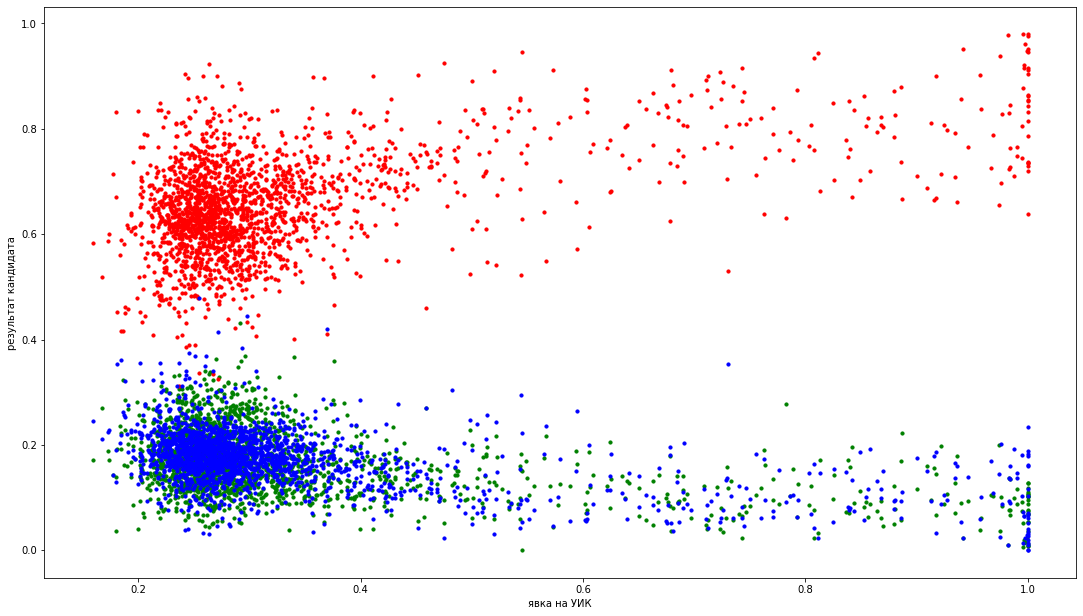

In [19]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
plt.scatter(x, y12, c='g', s = 10)
plt.scatter(x, y13, c='r', s = 10)
plt.scatter(x, y14, c='b', s = 10)
# plt.scatter(x, y12, y13, y14)
plt.xlabel('явка на УИК') 
plt.ylabel('результат кандидата') 